In [33]:
from google.colab import files
uploaded = files.upload()


Saving energydata_complete.csv to energydata_complete.csv


In [34]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['energydata_complete.csv']))
print(df)


                      date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0      2016-01-11 17:00:00          60      30  ...   5.300000  13.275433  13.275433
1      2016-01-11 17:10:00          60      30  ...   5.200000  18.606195  18.606195
2      2016-01-11 17:20:00          50      30  ...   5.100000  28.642668  28.642668
3      2016-01-11 17:30:00          50      40  ...   5.000000  45.410389  45.410389
4      2016-01-11 17:40:00          60      40  ...   4.900000  10.084097  10.084097
...                    ...         ...     ...  ...        ...        ...        ...
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  3

In [35]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Q-12 A linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6)  What is the R^2 value in two d.p.?

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
sns.set()

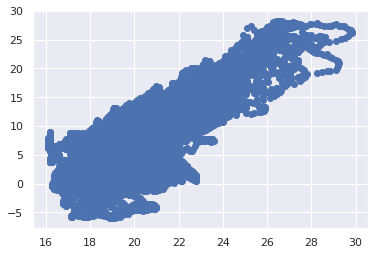

In [43]:
plt.scatter(df['T2'], df['T6'])

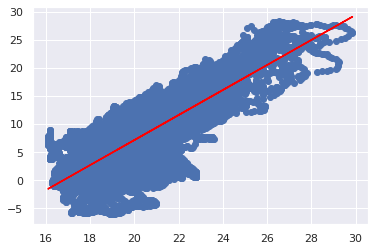

In [46]:
X = np.array(df['T2']).reshape(-1, 1)
y = df['T6']
rf = LinearRegression()
rf.fit(X, y)
y_pred = rf.predict(X)
plt.scatter(df['T2'], df['T6'])
plt.plot(X, y_pred, color='red')

**Calculating R2 Value**

In [49]:
def r2_score_from_scratch(ys_orig, ys_line):
    y_mean_line = [ys_orig.mean() for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))
r_squared = r2_score_from_scratch(y, y_pred)
print(r_squared)

0.6418990830855502


Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [54]:
df.drop(['lights'], axis = 1)

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [57]:
df.drop(['date'], axis = 1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [87]:
newdf=df.drop(['date','lights'], axis = 1)

In [88]:
print(newdf)

       Appliances         T1       RH_1  ...  Tdewpoint        rv1        rv2
0              60  19.890000  47.596667  ...   5.300000  13.275433  13.275433
1              60  19.890000  46.693333  ...   5.200000  18.606195  18.606195
2              50  19.890000  46.300000  ...   5.100000  28.642668  28.642668
3              50  19.890000  46.066667  ...   5.000000  45.410389  45.410389
4              60  19.890000  46.333333  ...   4.900000  10.084097  10.084097
...           ...        ...        ...  ...        ...        ...        ...
19730         100  25.566667  46.560000  ...  13.333333  43.096812  43.096812
19731          90  25.500000  46.500000  ...  13.300000  49.282940  49.282940
19732         270  25.500000  46.596667  ...  13.266667  29.199117  29.199117
19733         420  25.500000  46.990000  ...  13.233333   6.322784   6.322784
19734         430  25.500000  46.600000  ...  13.200000  34.118851  34.118851

[19735 rows x 27 columns]


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(newdf))
appliances_target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,0.898317,0.000000,0.858624,0.755319,0.768386,0.701645,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,0.880852,0.000000,0.864010,0.752280,0.768386,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,0.864260,0.000000,0.862394,0.751773,0.768386,0.687457,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,0.829525,0.000000,0.858624,0.748075,0.764953,0.682617,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [94]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(normalised_df,test_size=0.3, random_state=1)


In [91]:
linear_model = LinearRegression()

In [96]:
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [97]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

ValueError: ignored

In [79]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,3)

0.0